In [20]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
pre_trained = np.load('./log/testoriginal.npz')['rewards']
data_tds2 = np.load('./log/testtds2.npz')['rewards']
data_tds = np.load('./log/testtds.npz')['rewards']
data_dps = np.load('./log/testdps.npz')['rewards']
bestk =[]
for i in range(int(len(pre_trained)/10)-1 ):
    bestk.append(np.max(pre_trained[i*10: (i+1) * 10]) )

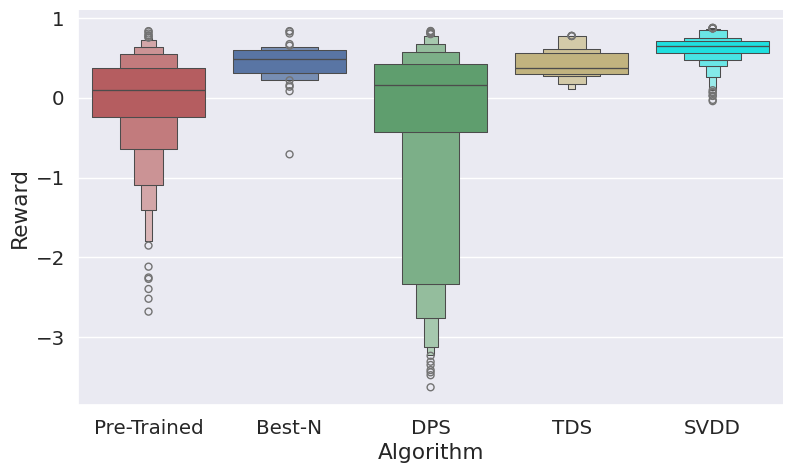

In [26]:
compare = np.concatenate( (pre_trained, bestk, data_dps, data_tds, data_tds2 ), axis= 0)

type1 = ['Pre-Trained' for i in range(len(data ))]
type2 = ['Best-N' for i in range(len(bestk))]
type3 = ['DPS' for i in range(len(data))]
type4 = ['TDS' for i in range(len(data))]
type5 = ['SVDD' for i in range(len(data))]

type =   type1 + type2   + type3 +  type4 + type5
data_dict = {'Algorithm': type, 'Reward': compare }
plot_data = pd.DataFrame(data_dict)
my_pal = {"Pre-Trained": "r", "Best-N": "b", "DPS": "g", "TDS":"y", "SVDD":"cyan"}
fig = sns.catplot(data=plot_data, x = 'Algorithm', y =  'Reward', hue="Algorithm", kind="boxen" , palette=my_pal, height= 5.0, aspect= 8.2/5.0)
sns.set(font_scale=1.3)